<a href="https://colab.research.google.com/github/Katas-23/TCS_EV_Project/blob/main/Urban_vs_Rural_The_Difference_Shown_by_Electric_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Urban vs. Rural: The Difference Shown by Electric Vehicles**
## **David Gyulgyulyan**
### **ID: 6_Gyulgyulyan**

## **Abstract**

### **Problem**

Electric vehicle (EV) adoption is essential for meeting the U.S. target of replacing all new vehicle sales with EVs by 2035. However, adoption rates may not be uniform across different types of communities. This study investigates the difference in EV adoption between urban and rural counties to identify potential gaps.

### **Approach**

Using a dataset of registered EVs in Washington State, I created a new "Area Type" column to categorize each record as urban or rural. Counts of EVs by area type were calculated and visualized. Various statistical approaches (Chi-square tests, machine learning models) were explored but found unsuitable due to data characteristics.

### **Results**

Urban counties contained a drastically higher number of EVs compared to rural counties, with rural areas showing significantly lower adoption despite statewide incentives.

### **Conclusion**

The results highlight a clear urban-rural divide in EV adoption, suggesting that rural areas may be at risk of falling behind state and national EV targets. Addressing infrastructure, accessibility, and economic barriers in rural regions will be critical to ensuring equitable progress.

## **Background**

The shift toward electric vehicles is central to reducing greenhouse gas emissions and meeting ambitious climate targets, such as Washington State's plan for all new vehicle sales to be electric by 2035. While EV adoption has grown in recent years, it is unclear whether this growth is evenly distributed across urban and rural areas. This matters because unequal adoption could create pockets of underprepared communities, limiting the environmental benefits of the transition.

The dataset used in this study contains registration records for EVs in Washington State, with details such as vehicle make, model, electric range, and county. To investigate the geographic disparity, I created an "Area Type" column that classifies each county as either urban or rural.

### **Research Question**

How does electric vehicle availability differ between urban and rural counties, and what might this tell us about the difference between the area types?

### **Hypothesis**

Urban vs rural location plays a major role in EV adoption, due to greater infrastructure, economic capacity, and exposure to EV adoption incentives.

## **Results**

In [12]:
# Before continuing, run this mega block of code.
!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns


url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD" # This is the direct link to the CSV data

ev_df = pd.read_csv(url)

wa_df = ev_df[ev_df['State'] == 'WA']

wa_df[wa_df.isna().any(axis = 1)]

ev_df_clean = wa_df.dropna(subset=['Electric Range', 'Base MSRP']) # Drop null values in these 2 columns.
ev_df_clean = ev_df_clean.drop(columns=['Vehicle Location']) # This column is useless, so remove it.
ev_df_clean.reset_index(drop=True, inplace=True) # Reset index.

# Creating a copy of the dataset.
area_type_df = ev_df_clean.copy()

# Urban counties are ones that are popular and have a high population.
urban_counties = [
    'King', 'Pierce', 'Snohomish',
    'Spokane', 'Clark', 'Thurston', 'Kitsap'
]

# Rural counties are ones that do not fit in the urban category.
rural_counties = [
    'Yakima', 'Whitman', 'Cowlitz', 'Jefferson', 'Island',
    'Klickitat', 'Whatcom', 'San Juan', 'Chelan', 'Lewis',
    'Kittitas', 'Skagit', 'Mason', 'Clallam', 'Grays Harbor',
    'Douglas', 'Franklin', 'Benton', 'Walla Walla', 'Wahkiakum',
    'Skamania', 'Grant', 'Pacific', 'Asotin', 'Lincoln',
    'Stevens', 'Okanogan', 'Adams', 'Pend Oreille', 'Ferry', 'Columbia',
    'Garfield'
]

# These were determined from a population density map of counties in the Washington state.

# This is where the classification of urban vs. rural began.
# Define county type assigner function.
def categorize_county(county):
    if county in urban_counties:
        return 'Urban'
    elif county in rural_counties:
        return 'Rural'
    else:
        return 'Unknown'  # Handle cases where a county might not be in either list, acts as a failsafe.

# Run the code.
area_type_df['Area Type'] = area_type_df['County'].apply(categorize_county)

/tmp/ipython-input-3700738062.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values, palette=colors)


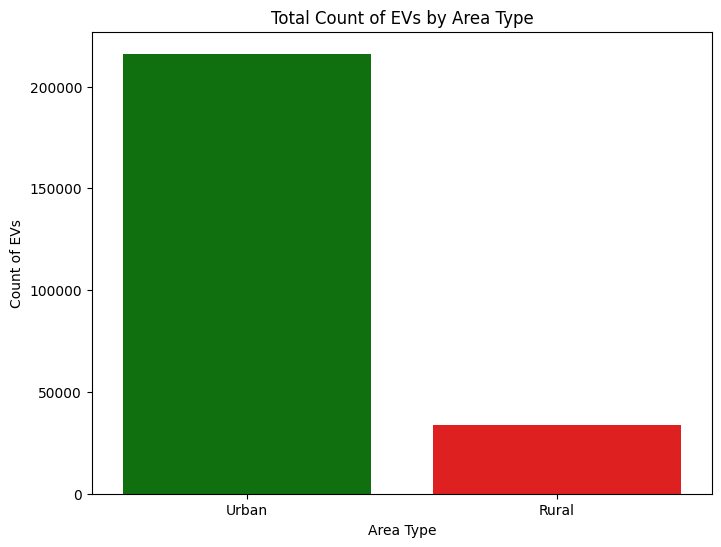

In [13]:
# Group by 'Area Type' and count the number of EVs
ev_counts_by_area = area_type_df['Area Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['green' if area == 'Urban' else 'red' for area in ev_counts_by_area.index]
sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values, palette=colors)
plt.title('Total Count of EVs by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count of EVs')
plt.show()

The result graph shows a huge amount of difference.
The independent variables are the county types, as discussed before.
The dependent variable consists of the total count of electric vehicles in this dataset.

Urban counties, even though there are only 7 of them, have 216,101 total electric vehicles.
Rural counties only have 33,954 electric vehicles, even though there are 32 of them.

That means about 86.4% of the total electric vehicles are in urban counties!

In [18]:
# Before continuing, run this new mega block of code. Afterwards, run the following blocks of code.
msrp_df = ev_df_clean[ev_df_clean['Base MSRP'] > 0]

int_df = msrp_df.copy()

int_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = ev_df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace({
    'Clean Alternative Fuel Vehicle Eligible': 1,
    'Not eligible due to low battery range': 0,
    'Eligibility unknown as battery range has not been researched': 0 # These aren't eligible as well, but this is here just in case.
})

def categorize_county(county):
    if county in urban_counties:
        return 'Urban'
    elif county in rural_counties:
        return 'Rural'
    else:
        return 'Unknown'  # Handle cases where a county might not be in either list, acts as a failsafe.

# Run the code.
int_df['Area Type'] = int_df['County'].apply(categorize_county))

Run the next block of code.


/tmp/ipython-input-3142056652.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  int_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = ev_df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace({


Shape of X_train: (2552, 28)
Shape of X_test: (638, 28)
Shape of y_train: (2552,)
Shape of y_test: (638,)
Accuracy: 0.8495297805642633
Precision: 0.8495297805642633
Recall: 1.0
F1-score: 0.9186440677966101
Confusion Matrix:
[[  0  96]
 [  0 542]]


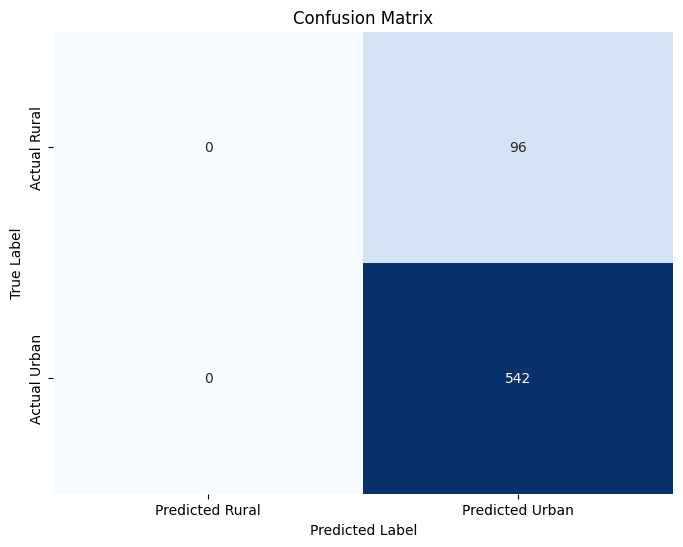

In [19]:
# Create a copy of the int_df DataFrame
class_df_area = int_df.copy()

# Define features (X) and target (y)
X = class_df_area[['Make', 'Model', 'Electric Range', 'Base MSRP']]
y = class_df_area['Area Type']

# Apply one-hot encoding to 'Make' and 'Model' columns
X = pd.get_dummies(X, columns=['Make', 'Model'], drop_first=True)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the training data
knn.fit(X_train, y_train)

# Use the trained KNN model to make predictions on the testing data
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Urban')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Urban')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='Urban')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Rural', 'Urban'])

# Print the calculated metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Rural', 'Predicted Urban'],
            yticklabels=['Actual Rural', 'Actual Urban'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

What if we tried to predict an area type based on electric vehicle data?
To perform that, a simple machine learning model was trained on a small sample of this dataset to then guess whether an electric vehicle was located in an urban or rural county.
The results are shocking, but also kind of expected.
The machine learning model was heavily biased and guessed every single electric vehicle model to be in an urban county.
This means that the difference is so unbalanced that it caused the model to guess that every car was in an urban county.


What we have here is called a Confusion Matrix.
The 542 guesses are where the model guessed correctly.
The 96 guesses are where the model guessed EVs to be in an urban county, but they were actually in a rural county.

## **Discussion**

**What does all of this mean? And how can it be connected to real-life?**
Transportation planners and policymakers need to consider geographical barriers, not just incentives or vehicle availability.
Rural counties may face limited access to charging stations, due to the lack of EVs compared to urban counties, making EV ownership impractical despite eligibility or interest.
If this is not fixed, the transition to all electric vehicles by 2035 could be much harder to achieve.
It could also worsen the divide in transportation benefits in urban and rural counties.

**What are the next steps, and what future research can be done?**
Next, we can focus on the charging infrastructure availability by urban and rural counties.
This could further support the argument on why the divide is a massive issue.
We can then focus on analyzing the thoughts of electric vehicles from people living in rural counties.
We can also conduct the same analysis on other counties in the United States.

**Electric vehicle adoption is not just about the cars, but also about where people live.**
Urban areas are naturally better suited for early electric vehicle adoption due to infrastructure and density.
The rural gap highlights the importance of location-specific policies and investments.
Data like this helps reveal hidden barriers that raw vehicle counts or eligibility percentages cannot show.
**If we want to create a future where all cars are electric, we must address geographic disparities, not just technological ones.**

## **Code and Data Availability**

The dataset used in this project was sourced from here:
https://catalog.data.gov/dataset/electric-vehicle-population-data

GitHub Repository:
https://github.com/Katas-23/TCS_EV_Project

All code was written in Google Colab.

## **Acknowledgements**

**I would like to thank…**

Jian Zheng, my mentor.

Jonathan Tran, my TA.

The Coding School, for making this project possible.